In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
import datetime
plt.style.use('ggplot')
sns.set()

In [2]:
boston_reviews = pd.read_csv('data/boston_reviews.csv',low_memory =False)
boston_listings = pd.read_csv('data/boston_listings.csv',low_memory =False)
boston_calendar = pd.read_csv('data/boston_calendar.csv',low_memory =False)

In [3]:
#Data set size 
print(f"Boston listings has {boston_listings.shape[0]} rows and {boston_listings.shape[1]} columns")
print(f"Boston reviews  has {boston_reviews.shape[0]}  rows and {boston_reviews.shape[1]}  columns")
print(f"Boston Calendar has {boston_calendar.shape[0]} rows and {boston_calendar.shape[1]} columns")

Boston listings has 3585 rows and 95 columns
Boston reviews  has 68275  rows and 6  columns
Boston Calendar has 1308890 rows and 4 columns


## Understanding the dataset

- boston_reviews  : unique id for each reviewer and detailed comments
- boston_listings : Listings, including full descriptions and average review score
- boston_calendar : including listing id and the price and availability for that day

### Exploratory Data Analysis

In [4]:
#Listing statistical properties
boston_listings[boston_listings.columns[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
scrape_id,"3,585.00","20,160,906,204,935.00",0.00,"20,160,906,204,935.00","20,160,906,204,935.00","20,160,906,204,935.00","20,160,906,204,935.00","20,160,906,204,935.00"
host_id,"3,585.00","24,923,107.45","22,927,809.87","4,240.00","6,103,425.00","19,280,995.00","36,221,474.00","93,854,106.00"
host_listings_count,"3,585.00",58.90,171.12,0.00,1.00,2.00,7.00,749.00
host_total_listings_count,"3,585.00",58.90,171.12,0.00,1.00,2.00,7.00,749.00
neighbourhood_group_cleansed,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,"3,585.00",42.34,0.02,42.24,42.33,42.35,42.35,42.39
longitude,"3,585.00",-71.08,0.03,-71.17,-71.11,-71.08,-71.06,-71.00
accommodates,"3,585.00",3.04,1.78,1.00,2.00,2.00,4.00,16.00
bathrooms,"3,571.00",1.22,0.50,0.00,1.00,1.00,1.00,6.00
bedrooms,"3,575.00",1.26,0.75,0.00,1.00,1.00,2.00,5.00


#### Which column still have more than 75% of missing values

In [5]:
boston_listings.columns[boston_listings.isnull().mean()>0.75]

Index(['neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'has_availability', 'license', 'jurisdiction_names'],
      dtype='object')

we see that some columns are all null and some seems to have a lot of null values. let's check the missing values count

In [6]:
#Missing values
data_info = pd.DataFrame(boston_listings.dtypes).T.rename(index={0:'column type'})
data_info = data_info.append(pd.DataFrame(boston_listings.isnull().sum()).T.rename(index={0:'null values(nb)'}))
data_info = data_info.append(pd.DataFrame(boston_listings.isnull().sum()/boston_listings.shape[0]*100).T.rename(index={0:'null values (%)'}))
data_info

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
column type,int64,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,float64,float64,object,object,object,int64,float64,float64,float64,object,object,float64,object,object,object,object,object,int64,object,int64,int64,object,float64,int64,int64,int64,int64,object,int64,object,object,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,object,object,object,object,int64,float64
null values(nb),0,0,0,0,0,143,1057,0,0,1415,1975,1290,1489,1554,1192,599,599,0,599,0,0,0,0,11,1309,471,471,471,0,0,0,339,0,0,0,0,0,0,543,0,3585,2,0,38,14,0,0,0,0,0,0,3,0,0,14,10,9,0,0,3529,0,2693,2697,2243,1107,0,0,0,0,0,3585,0,0,0,0,0,0,756,756,813,823,818,820,818,822,821,0,3585,3585,0,0,0,0,0,756
null values (%),0.0,0.0,0.0,0.0,0.0,3.99,29.48,0.0,0.0,39.47,55.09,35.98,41.53,43.35,33.25,16.71,16.71,0.0,16.71,0.0,0.0,0.0,0.0,0.31,36.51,13.14,13.14,13.14,0.0,0.0,0.0,9.46,0.0,0.0,0.0,0.0,0.0,0.0,15.15,0.0,100.0,0.06,0.0,1.06,0.39,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.39,0.28,0.25,0.0,0.0,98.44,0.0,75.12,75.23,62.57,30.88,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,21.09,21.09,22.68,22.96,22.82,22.87,22.82,22.93,22.9,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,21.09


We are going to remove irrelevant columns for our analysis as well as columns with more than 75% of null values.

In [7]:
#remove unused columns
cols_drops=['listing_url','scrape_id','jurisdiction_names','license','thumbnail_url','medium_url','picture_url',
            'xl_picture_url','host_thumbnail_url','host_picture_url','notes','transit','access','interaction','house_rules','host_url','host_location','host_about',
            'host_neighbourhood','host_verifications','street','country_code','country','jurisdiction_names','license','notes']
boston_listings= boston_listings.drop(cols_drops, axis=1)
boston_listings.shape

(3585, 72)

In [8]:
##Checking if there is duplicates values in ListingId
boston_listings.duplicated().sum()

0

#### Cleaning up price column
Currently, the price column has a percent sign that makes it appear as string. We are going to remove the '$' and convert  to decimal 

In [9]:
price_clean   = lambda x: x.replace('$','') if str(x).startswith('$') else x
replace_comma = lambda x: x.replace(',','') if str(x).contains(',') else x

cols = ['price','cleaning_fee','extra_people']

for col in cols:
    boston_listings[col] = pd.to_numeric(boston_listings[col].apply(price_clean).str.replace(',',''))

In [10]:
boston_listings.head()

,id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",31303940,Virginia,2015-04-15,NaN,NaN,NaN,f,1,1,t,f,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",42.28,-71.13,t,House,Entire home/apt,4,1.50,2.00,3.00,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.00,NaN,NaN,NaN,35.00,1,0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",2572247,Andrea,2012-06-07,within an hour,100%,100%,f,1,1,t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",42.29,-71.13,t,Apartment,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.00,$400.00,NaN,$95.00,10.00,0,0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.00,10.00,9.00,10.00,10.00,9.00,9.00,f,t,moderate,f,f,1,1.30
2,6976,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,16701,Phil,2009-05-11,within a few hours,100%,88%,t,1,1,t,t,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",42.29,-71.14,t,Apartment,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,65.00,$395.00,"$1,350.00",NaN,NaN,1,20.00,3,45,5 days ago,NaN,19,46,61,319,2016-09-06,41,2009-07-19,2016-08-05,98.00,10.00,9.00,10.00,10.00,9.00,10.00,f,f,moderate,t,f,1,0.47
3,1436513,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,6031442,Meghna,2013-04-21,within a few hours,100%,50%,f,1,1,t,f,NaN,Roslindale,NaN,Boston,MA,NaN,Boston,"Boston, MA",42.28,-71.12,f,House,Private room,4,1.00,1.00,2.00,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,75.00,NaN,NaN,$100.00,50.00,2,25.00,1,1125,a week ago,NaN,6,16,26,98,2016-09-06,1,2016-08-28,2016-08-28,100.00,10.00,10.00,10.00,10.00,10.00,10.00,f,f,moderate,f,f,1,1.00
4,7651065,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block..

#### What are the different room types

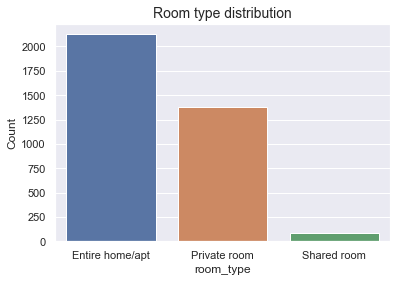

In [11]:
room = boston_listings['room_type'].value_counts().reset_index().rename(columns={'index':'room_type','room_type':'Count'})

sns.barplot(x='room_type',y='Count', data=room).set_title('Room type distribution', fontsize=14) ;

It looks like people usually let the entire room or apt  for rent 

In [12]:
boston_listings['Year_since']=pd.DatetimeIndex(boston_listings['host_since']).year
boston_listings['Month_since']=pd.DatetimeIndex(boston_listings['host_since']).month
boston_listings['Month_Year_since']=pd.to_datetime(boston_listings['host_since']).dt.to_period('M')


## Here are the Business questions we will be answering while exploring the data
1- How has the AirbnB business growth or evolution in Boston ? </br>
2- what are the most popular neigbourhoud ? and what make them popular ?</br>
3- When is the busiest time for the business ?</br>
4- Booking price prediction </br>
5- What features are most related to the  price ?

### 1- Business Evolution over the years
To analyse how the business has grown over the years, we are going to examine the column host_since, that tells us since when the host has registered. We will take a look that the availability in the calendar analyze the revenue evolution.
 #### a - How many people have registered over the years ?

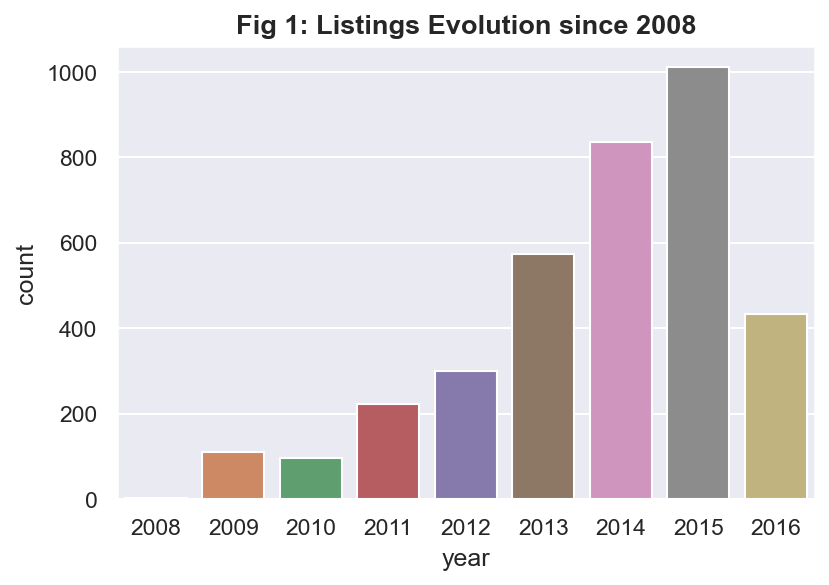

In [13]:
evolution = boston_listings[['Year_since','host_id']].groupby('Year_since').count().reset_index().rename(columns={'Year_since':'year','host_id':'count'})
fig = plt.figure(dpi=150)
sns.barplot(x='year',y='count',data=evolution).set_title('Fig 1: Listings Evolution since 2008', fontsize=13,weight='bold') ;
fig.savefig('images/evolution.png')

In [14]:
evolution

,year,count
0,2008,3
1,2009,110
2,2010,95
3,2011,222
4,2012,300
5,2013,575
6,2014,836
7,2015,1011
8,2016,433


In [15]:
max(boston_listings.host_since)

'2016-09-06'

The business started in Boston in 2008 with only 3 listings, and 110 the next year. The business has been growing consistantly over the years. We see a drop in 2016, but it is probably due to the last date that the data was collected.

#### b- How has revenue grown over the years ?


In [16]:
#adding year, month and yearMonth columns
boston_calendar['Year']=pd.DatetimeIndex(boston_calendar['date']).year
boston_calendar['Month']=pd.DatetimeIndex(boston_calendar['date']).month
boston_calendar['Month_Year']=pd.to_datetime(boston_calendar['date']).dt.to_period('M')
boston_calendar['weekday']=pd.to_datetime(boston_calendar['date']).dt.day_name()
boston_calendar.head()


,listing_id,date,available,price,Year,Month,Month_Year,weekday
0,12147973,2017-09-05,f,NaN,2017,9,2017-09,Tuesday
1,12147973,2017-09-04,f,NaN,2017,9,2017-09,Monday
2,12147973,2017-09-03,f,NaN,2017,9,2017-09,Sunday
3,12147973,2017-09-02,f,NaN,2017,9,2017-09,Saturday
4,12147973,2017-09-01,f,NaN,2017,9,2017-09,Friday


In [17]:
#Convert date to seasons
def month_to_season(month):
    return month%12//3 +1

seasons_mapping = {1: 'winter', 2: 'spring',3: 'summer', 4: 'fall'}
boston_calendar['season_id'] = boston_calendar['Month'].apply(month_to_season)
boston_calendar['season']=boston_calendar['season_id'].apply(lambda x :seasons_mapping[x])
boston_calendar['available']=boston_calendar['available'].apply(lambda x: 'Yes' if x=='t' else 'No')

In [18]:
boston_calendar['available'].value_counts()

No     665853
Yes    643037
Name: available, dtype: int64

Looking at the List price in this data set, we see that the price is null when the listing is not available. Therefore, we are going to fill that value with the price from the listing dataset

In [19]:
def get_listPrice(listingId):
    return boston_listings[boston_listings.id==listingId]['price'].values[0]


In [20]:
all_missing = list(boston_calendar[boston_calendar['price'].isnull()]['listing_id'].drop_duplicates())
all_missing[:5]

[12147973, 3075044, 6976, 1436513, 7651065]

In [21]:
#for listingid in all_missing:
#    listprice = get_listPrice(listingid)
#    boston_calendar.loc[((boston_calendar['listing_id']==listingid) & (boston_calendar['price'].isnull())),'price'] = listprice    

In [22]:
boston_calendar.head()

,listing_id,date,available,price,Year,Month,Month_Year,weekday,season_id,season
0,12147973,2017-09-05,No,NaN,2017,9,2017-09,Tuesday,4,fall
1,12147973,2017-09-04,No,NaN,2017,9,2017-09,Monday,4,fall
2,12147973,2017-09-03,No,NaN,2017,9,2017-09,Sunday,4,fall
3,12147973,2017-09-02,No,NaN,2017,9,2017-09,Saturday,4,fall
4,12147973,2017-09-01,No,NaN,2017,9,2017-09,Friday,4,fall


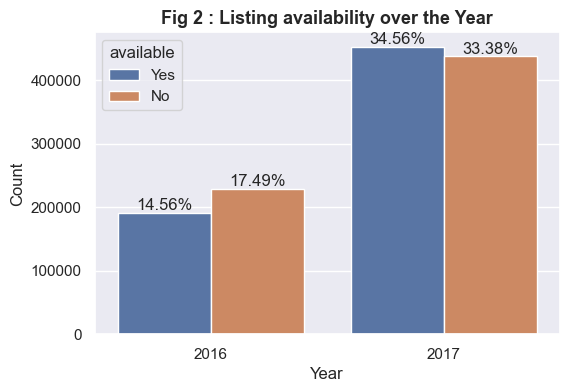

In [23]:
plot_data = boston_calendar[['Year','available']].value_counts().reset_index()
plot_data.columns=['Year','available','Count']

fig = plt.figure(dpi=100)
sns.barplot(data=plot_data, y='Count',x='Year',hue='available').set_title('Fig 2 : Listing availability over the Year',fontsize=13,weight='bold');
ax=plt.gca()
ax.set_alpha(0.8)
totals=[]
for i in ax.patches:
    totals.append(i.get_height())
total_len=sum(totals)
for p in ax.patches:
    ax.text(p.get_x()+.2,p.get_height()+.2,str(round((p.get_height()/total_len)*100,2))+'%',fontsize=12, ha='center',va='bottom');
fig.savefig('images/listin_availability.png')

In [24]:
plot_data

,Year,available,Count
0,2017,Yes,452406
1,2017,No,436922
2,2016,No,228931
3,2016,Yes,190631


We see that the number of listings availabe almost double in 2017 compare to 2016 as well as the occupancy level.

### 2- The most popular neighbourhood

In [25]:
neighbourhood = boston_listings[['neighbourhood_cleansed','id','price']].groupby('neighbourhood_cleansed').agg({'id':"count" , 'price':np.mean}).reset_index().rename(columns={'neighbourhood_cleansed':'neighbourhood','id':'count'}).sort_values(by='count', ascending=False)

In [26]:
print(f"There are {len(boston_listings['neighbourhood_cleansed'].value_counts())} distinct neighbourhood")

There are 25 distinct neighbourhood


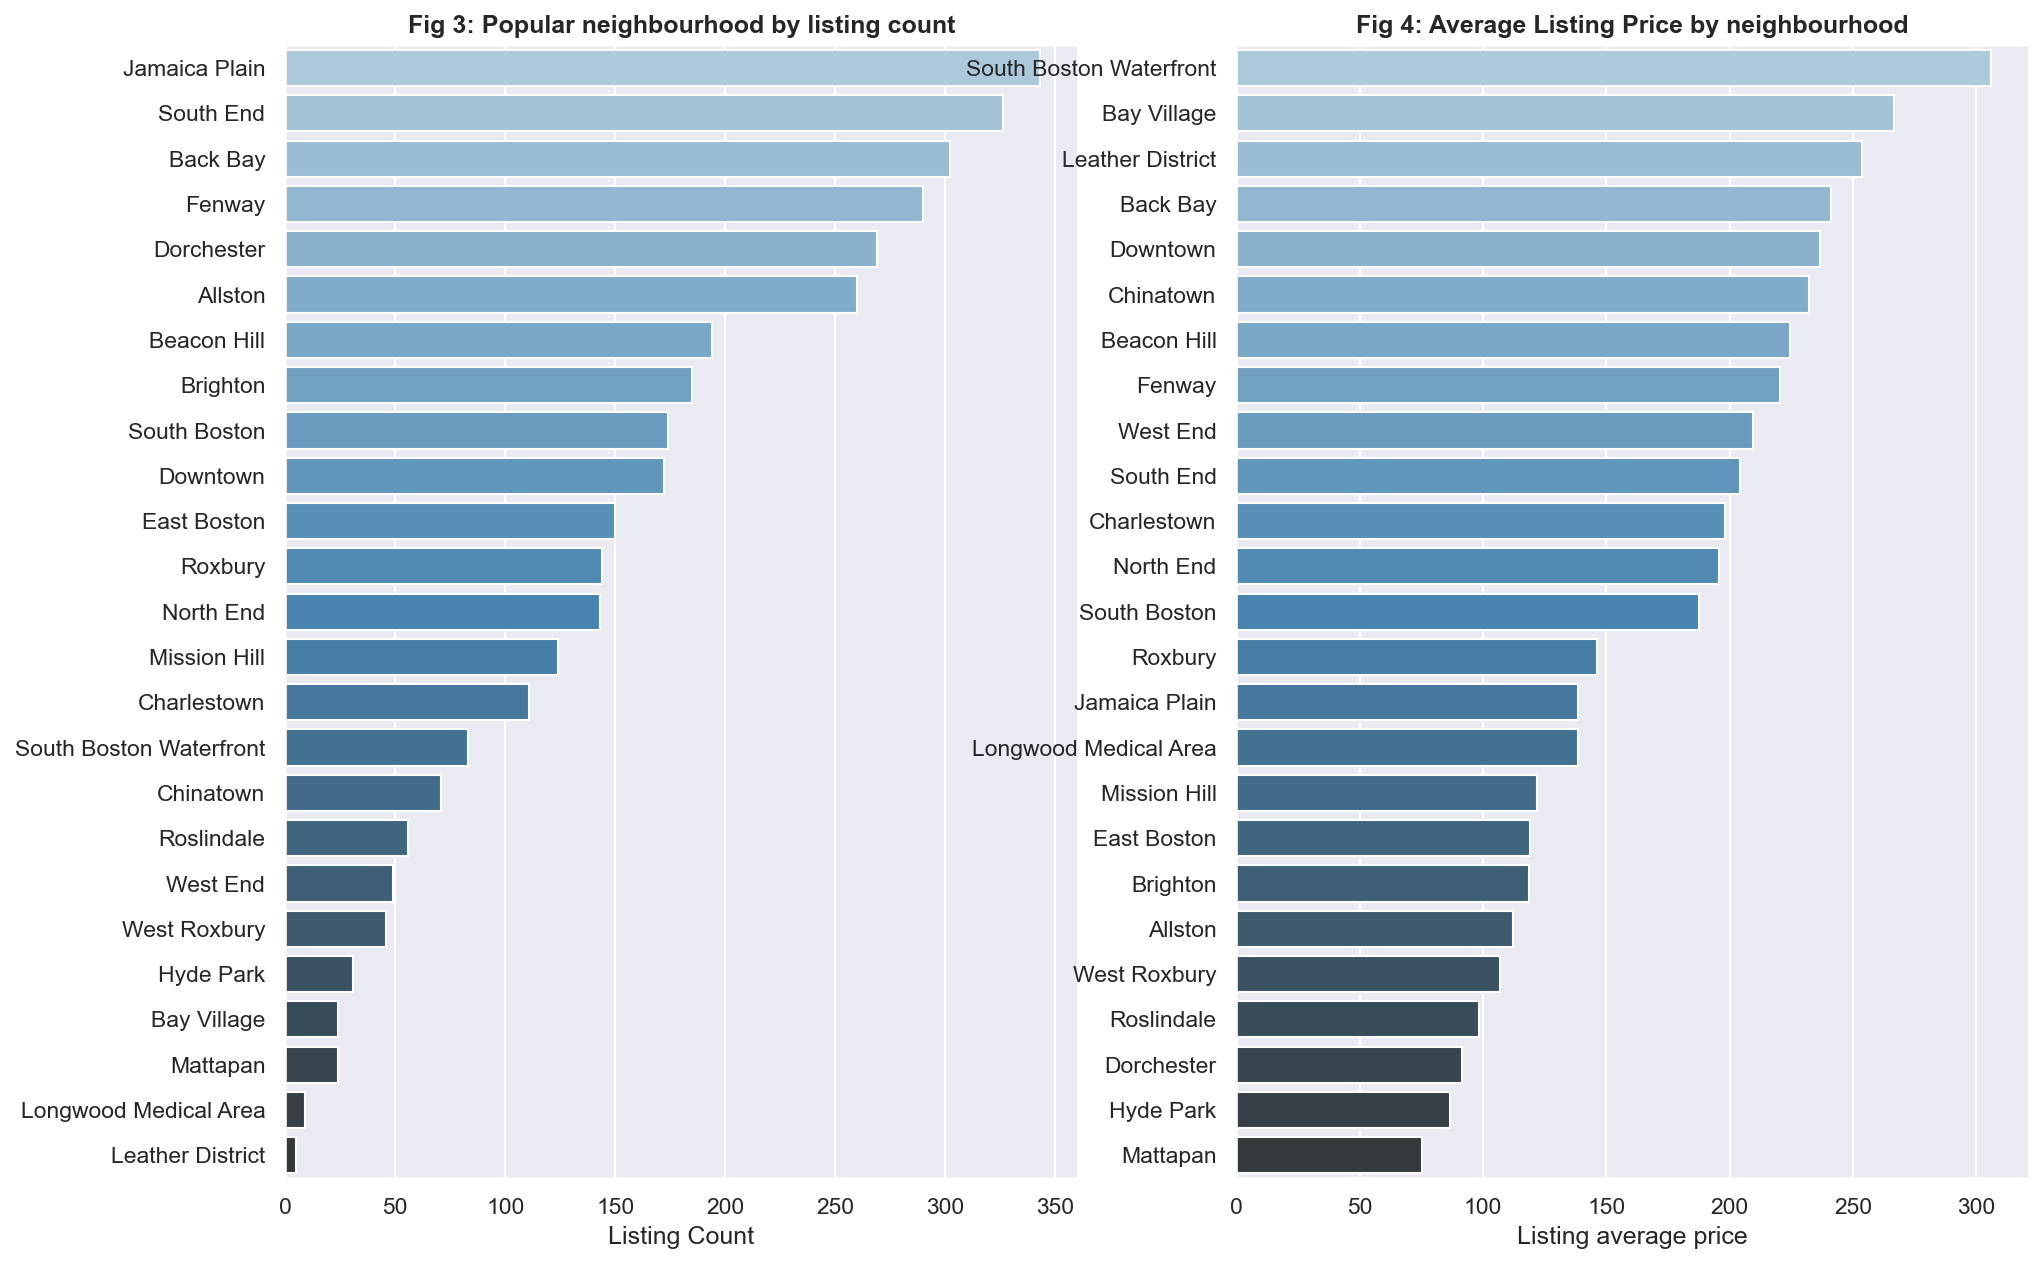

In [27]:
#top_area=boston_listings['neighbourhood_cleansed'].value_counts()#.plot(kind='barh')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10),dpi=150)
#top_area[:20].sort_values().plot(kind='barh').set_title('Fig 3: Top 20 neighbourhoods',fontsize=12, weight='bold');
plot_data = boston_listings[['neighbourhood_cleansed','id','price']].groupby('neighbourhood_cleansed').agg({'id':'count','price':'mean'}).reset_index()
plot_data.columns=['neighbourhood','listing_count','price']
plot_data1= plot_data[['neighbourhood','listing_count']].sort_values(by='listing_count', ascending=False)
plot_data2= plot_data[['neighbourhood','price']].sort_values(by='price', ascending=False)

sns.barplot(data=plot_data1, y='neighbourhood',x='listing_count',palette="Blues_d",ax=ax1).set_title('Fig 3: Popular neighbourhood by listing count',fontsize=12,weight='bold')
sns.barplot(data=plot_data2, y='neighbourhood',x='price',palette="Blues_d",ax=ax2).set_title('Fig 4: Average Listing Price by neighbourhood',fontsize=12,weight='bold')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel('Listing Count')
ax2.set_xlabel('Listing average price')
fig.savefig('images/top_20_neibourhood.png')


In [28]:
plot_data


,neighbourhood,listing_count,price
0,Allston,260,112.31
1,Back Bay,302,240.95
2,Bay Village,24,266.83
3,Beacon Hill,194,224.44
4,Brighton,185,118.77
5,Charlestown,111,198.05
6,Chinatown,71,232.35
7,Dorchester,269,91.64
8,Downtown,172,236.46
9,East Boston,150,119.15


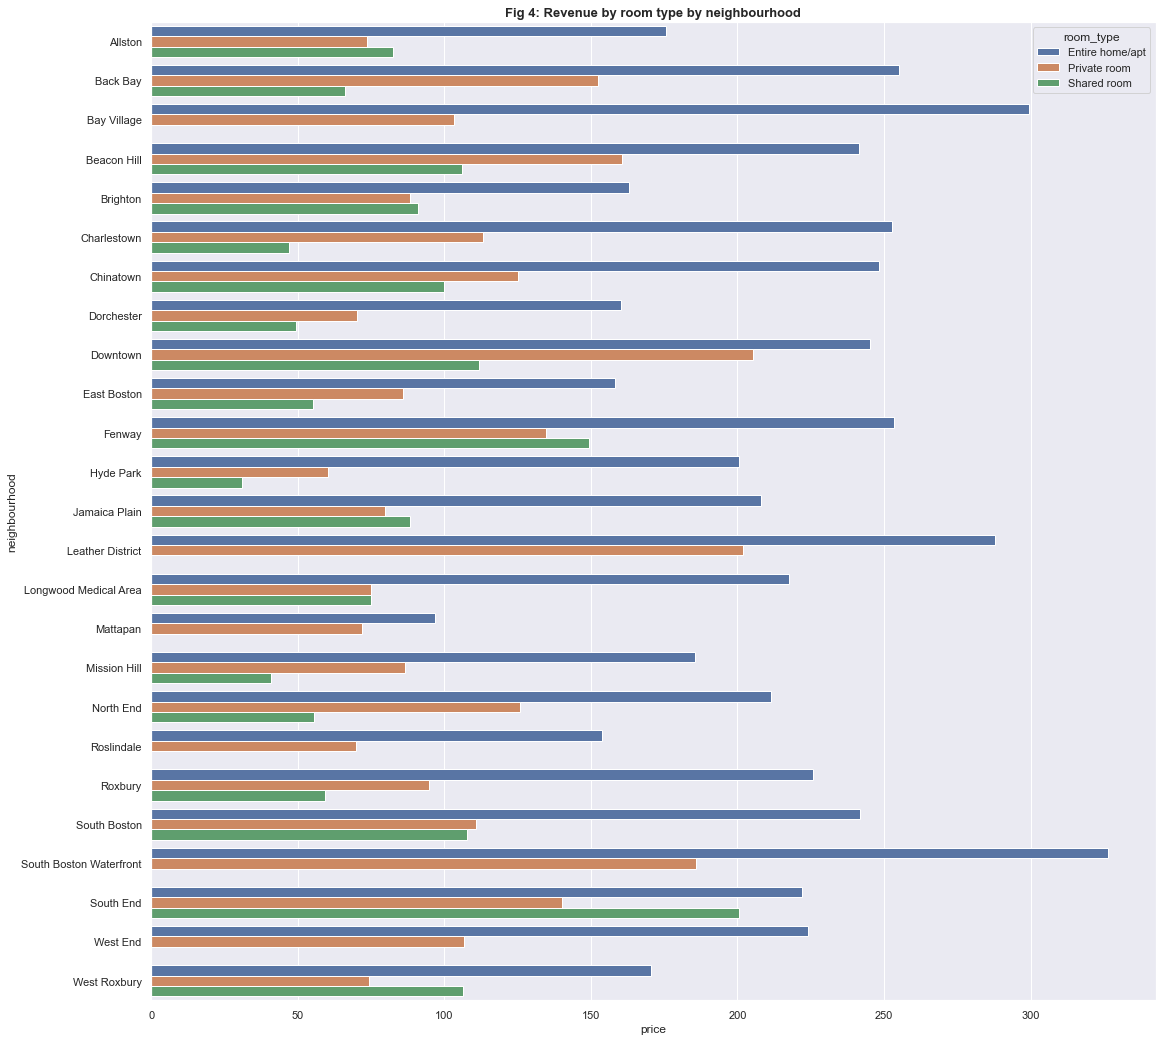

In [29]:
#mean price by neighbourhood and room type
plt.figure(figsize=(18,18))
plot_data = boston_listings[['neighbourhood_cleansed','room_type','price']].groupby(['neighbourhood_cleansed','room_type']).mean().reset_index()
plot_data.columns = ['neighbourhood','room_type','price']
plot_data.sort_values(by=['price','neighbourhood','room_type'], ascending=False)
#plot_data
sns.barplot(data=plot_data, y='neighbourhood',x='price',hue='room_type').set_title('Fig 4: Revenue by room type by neighbourhood',fontsize=13,weight='bold');

In [30]:
boston_calendar['price'] = pd.to_numeric(boston_calendar['price'].apply(price_clean).str.replace(',',''))
neighbourhooddf = boston_listings[['id','neighbourhood_cleansed']]
neighbourhooddf = boston_calendar.merge(neighbourhooddf, how='inner',left_on='listing_id', right_on='id')
neighbourhooddf.dtypes

listing_id                    int64
date                         object
available                    object
price                       float64
Year                          int64
Month                         int64
Month_Year                period[M]
weekday                      object
season_id                     int64
season                       object
id                            int64
neighbourhood_cleansed       object
dtype: object

In [31]:
neighbourhooddf.head() 

,listing_id,date,available,price,Year,Month,Month_Year,weekday,season_id,season,id,neighbourhood_cleansed
0,12147973,2017-09-05,No,NaN,2017,9,2017-09,Tuesday,4,fall,12147973,Roslindale
1,12147973,2017-09-04,No,NaN,2017,9,2017-09,Monday,4,fall,12147973,Roslindale
2,12147973,2017-09-03,No,NaN,2017,9,2017-09,Sunday,4,fall,12147973,Roslindale
3,12147973,2017-09-02,No,NaN,2017,9,2017-09,Saturday,4,fall,12147973,Roslindale
4,12147973,2017-09-01,No,NaN,2017,9,2017-09,Friday,4,fall,12147973,Roslindale


In [32]:
revenue = neighbourhooddf[['neighbourhood_cleansed','Year','price']].groupby(['neighbourhood_cleansed','Year']).sum().reset_index()
revenue.columns = ['neighbourhood','Year','TotalRevenue']
revenue= revenue.sort_values(by='TotalRevenue', ascending=False )
revenue['Total Revenue'] =revenue['TotalRevenue']/1000000.0

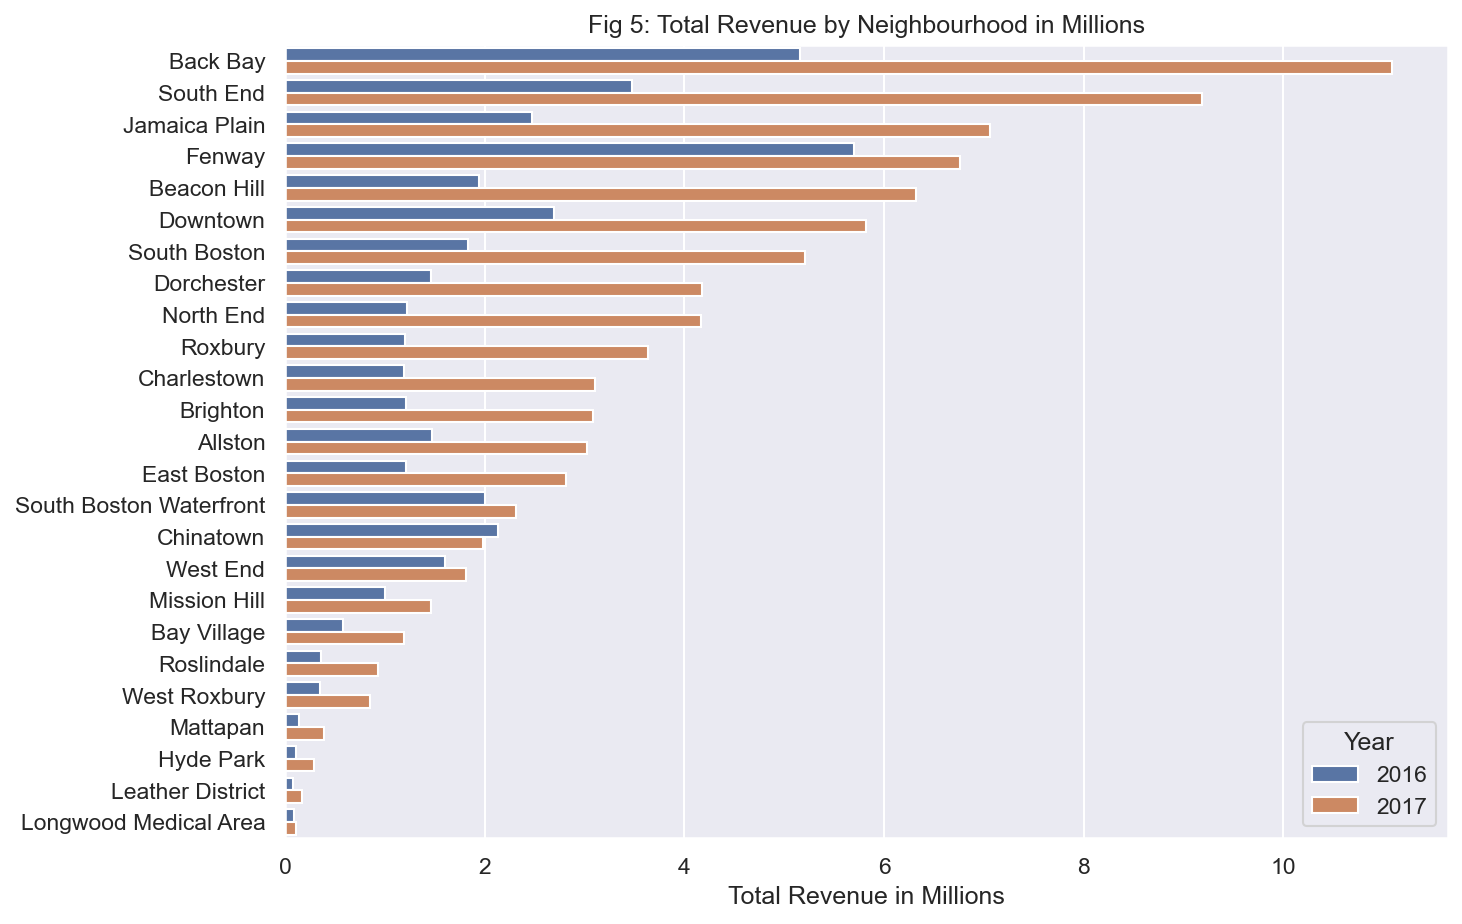

In [33]:
fig = plt.figure(figsize=(10,7), dpi=150)
sns.barplot(y='neighbourhood',x='Total Revenue', hue='Year',data=revenue)
plt.xlabel('Total Revenue in Millions')
plt.ylabel('')
plt.title('Fig 5: Total Revenue by Neighbourhood in Millions', fontsize=12)
fig.savefig('images/revenue.png')

Jamaica Plain,South End, Back Bay and FenWay are the neigbourhood with a lot of listing in Boston. But it is interesting to see that the area with most listings are not the most affordable. Jamaica Plain has an average price of `$138.48` per night and other neighbourhood are even more expensive. Those area are more expensive because they mostly offer the entire room/apt to their guests.

In [34]:
neighbourhood.sort_values(by='price')

,neighbourhood,count,price
15,Mattapan,24,75.12
11,Hyde Park,31,86.55
7,Dorchester,269,91.64
18,Roslindale,56,98.43
24,West Roxbury,46,107.11
0,Allston,260,112.31
4,Brighton,185,118.77
9,East Boston,150,119.15
16,Mission Hill,124,121.97
14,Longwood Medical Area,9,138.44


#### Neigbourhood by room type

In [35]:
boston_listings[['neighbourhood_cleansed','room_type']].value_counts().head(40)

neighbourhood_cleansed   room_type      
Back Bay                 Entire home/apt    263
South End                Entire home/apt    250
Fenway                   Entire home/apt    208
Dorchester               Private room       195
Jamaica Plain            Private room       181
                         Entire home/apt    157
Allston                  Private room       156
Beacon Hill              Entire home/apt    155
Downtown                 Entire home/apt    144
North End                Entire home/apt    119
Brighton                 Private room       103
South Boston             Entire home/apt    102
Allston                  Entire home/apt     98
Roxbury                  Private room        81
East Boston              Private room        77
Brighton                 Entire home/apt     75
Fenway                   Private room        73
South Boston Waterfront  Entire home/apt     71
East Boston              Entire home/apt     70
South Boston             Private room        69

### 3- Busiest time of the years

In [36]:
# print some generic statistics about the data
print(f"Shape of data: {boston_calendar.shape}")
print(f"Number of missing values in the data:\
{boston_calendar.isnull().sum().sum()}")

Shape of data: (1308890, 10)
Number of missing values in the data:665853


In [37]:
boston_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         665853
Year               0
Month              0
Month_Year         0
weekday            0
season_id          0
season             0
dtype: int64

In [38]:
# get statistics on the numerical columns
boston_calendar.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,"1,308,890.00","8,442,117.78","4,500,148.92","3,353.00","4,679,319.00","8,578,709.50","12,796,034.00","14,933,461.00"
price,"643,037.00",198.44,180.14,11.00,85.00,150.00,255.00,"7,163.00"
Year,"1,308,890.00","2,016.68",0.47,"2,016.00","2,016.00","2,017.00","2,017.00","2,017.00"
Month,"1,308,890.00",6.53,3.45,1.00,4.00,7.00,10.00,12.00
season_id,"1,308,890.00",2.50,1.11,1.00,2.00,3.00,3.00,4.00


In [39]:
boston_calendar.head()

,listing_id,date,available,price,Year,Month,Month_Year,weekday,season_id,season
0,12147973,2017-09-05,No,NaN,2017,9,2017-09,Tuesday,4,fall
1,12147973,2017-09-04,No,NaN,2017,9,2017-09,Monday,4,fall
2,12147973,2017-09-03,No,NaN,2017,9,2017-09,Sunday,4,fall
3,12147973,2017-09-02,No,NaN,2017,9,2017-09,Saturday,4,fall
4,12147973,2017-09-01,No,NaN,2017,9,2017-09,Friday,4,fall


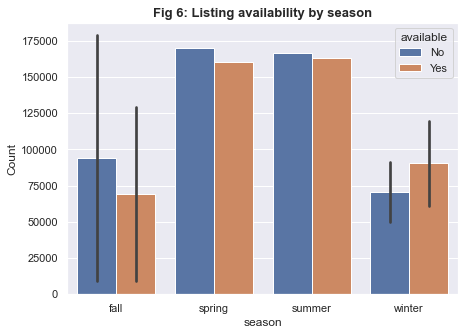

In [40]:
season = boston_calendar[['season','Year','available']].value_counts().reset_index()
season.columns=['season','Year','available','Count']

fig = plt.figure(figsize=(7,5))
sns.barplot(x='season',y='Count',hue='available', data = season).set_title('Fig 6: Listing availability by season',fontsize=13,weight='bold');
fig.savefig('images/listing_by_season.png')

<AxesSubplot:xlabel='Year', ylabel='Count'>

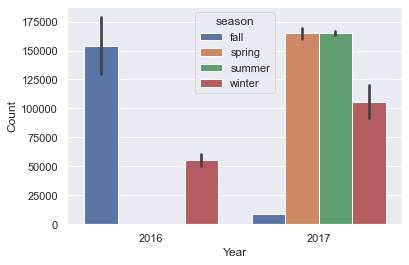

In [41]:
sns.barplot(x='Year',y='Count',hue='season', data = season)

We see that spring and summer  are the busiest seaosons. This is mostly probably because of rough weather conditions in fall and winter in Boston that show similar trend.

In [42]:
plot_data = boston_calendar[['Year','season','weekday','available']].value_counts().reset_index()
plot_data.columns=['Year','season','weekday','available','Count']
#plot_data = plot_data.melt(id_vars=['weekday', 'season','Year'],var_name='available', value_name='Count')
plot_data.head()

,Year,season,weekday,available,Count
0,2016,fall,Tuesday,No,26704
1,2016,fall,Wednesday,No,26448
2,2016,fall,Friday,No,25935
3,2016,fall,Saturday,No,25853
4,2017,spring,Wednesday,No,25615


''

<Figure size 1200x800 with 0 Axes>

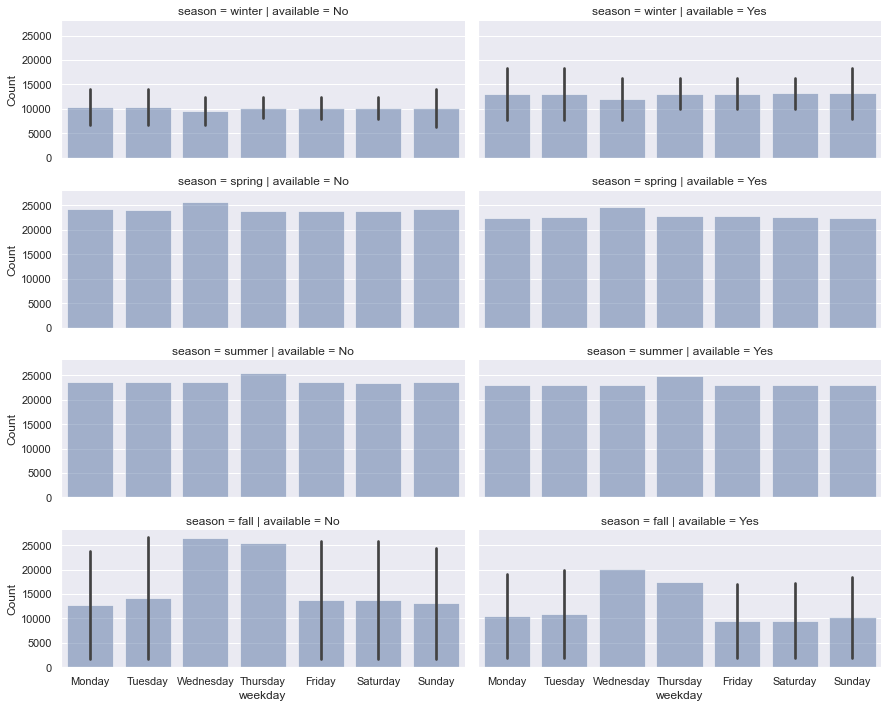

In [43]:
fig = plt.figure(dpi=200)
grid = sns.FacetGrid(plot_data, row='season', col='available',height=2.5, aspect=2.5,row_order=['winter', 'spring','summer', 'fall'])#set_title('Fig 7 Listing availability by season',fontsize=13,weight='bold')
grid.map(sns.barplot, 'weekday', 'Count', alpha=0.5, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
#plt.title('Fig 6: Listing availability distribution by seaon and days of the week', fontsize=12)
fig.savefig('images/listing_by_season_days.png')
;

We also see that in summer and fall, all days of the week seems to have similar trend of occupancy. However, in Fall,Wednesday and Thursday seems to have more visitors.